# Gonzalo de las Heras de Matías. July 2020.
### Universidad Europea de Madrid. Business & Tech School. IBM Master's Degree in Big Data Analytics.
#### Master's thesis:
### ADVANCED DRIVER ASSISTANCE SYSTEM (ADAS) BASED ON AUTOMATIC LEARNING TECHNIQUES FOR THE DETECTION AND TRANSCRIPTION OF VARIABLE MESSAGE SIGNS.

![title](notebook_data/imgs/uem_ibm.png)

#### Imports

In [6]:
from utils_ocr import detectedLine
from utils_ocr import functions
from pytesseract import Output
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import cv2

#### Examples

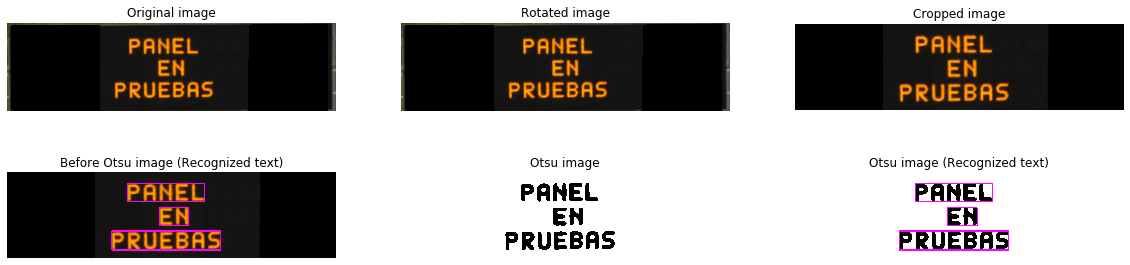


Tesseract recogntion before otsu:
---------------------------------

PANEL
EN
PRUEBAS

Tesseract recogntion after otsu:
--------------------------------

PANEL
EN
PRUEBAS


Mean rotation angle: -1.0



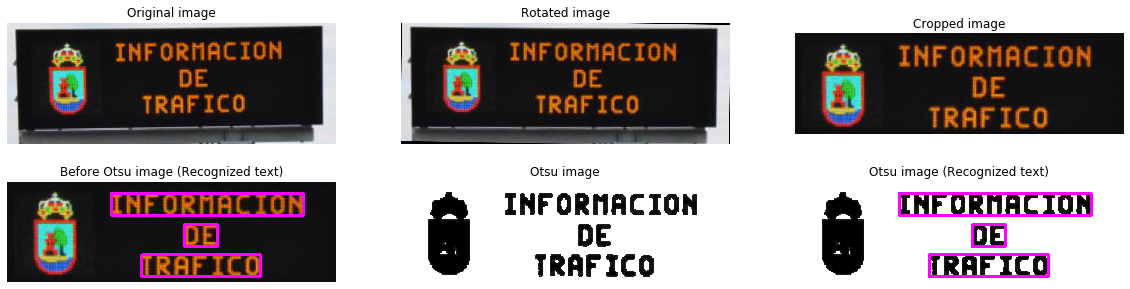


Tesseract recogntion before otsu:
---------------------------------

INFORMACION
DE
TRAFICO

Tesseract recogntion after otsu:
--------------------------------

INFORMACION
DE
TRÁFICO


Mean rotation angle: -1.0



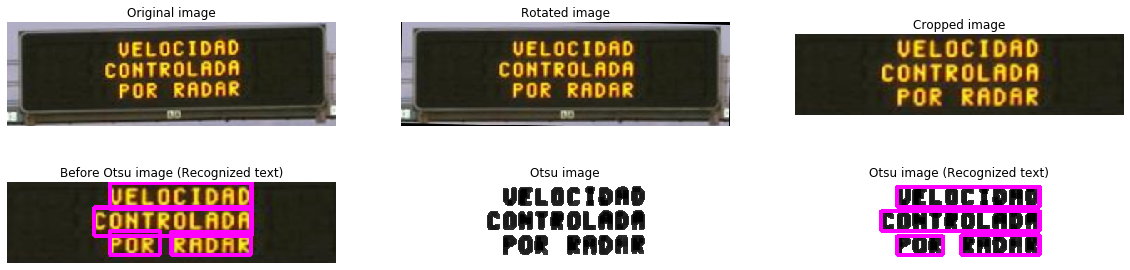


Tesseract recogntion before otsu:
---------------------------------

VELOCIDAD
CONTROLADA
POR RADAR

Tesseract recogntion after otsu:
--------------------------------

VELOCIDAD
CONTROLADA
POR RADAR


Mean rotation angle: 1.0



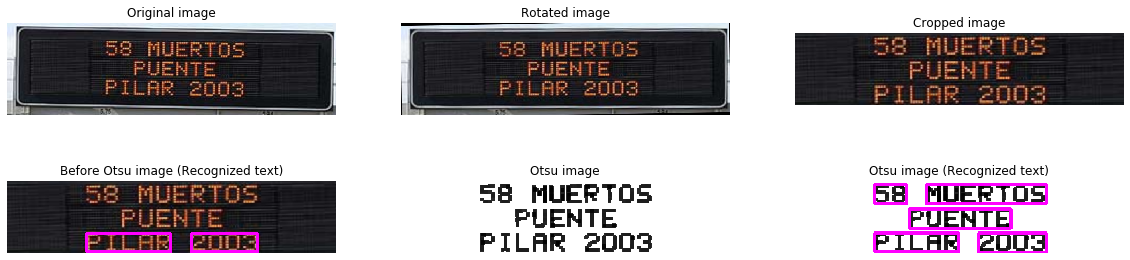


Tesseract recogntion before otsu:
---------------------------------

PILAR 2003

Tesseract recogntion after otsu:
--------------------------------

58 MUERTOS
PUENTE
PILAR 2003


Mean rotation angle: -2.0



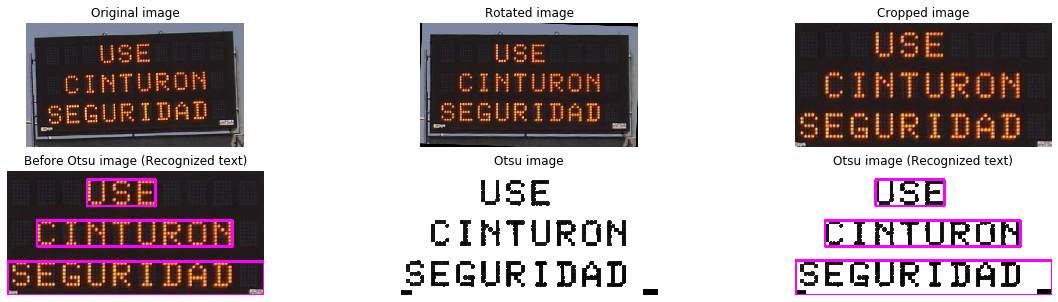


Tesseract recogntion before otsu:
---------------------------------

USE
CIMTUEDHA
SECUEIDAD

Tesseract recogntion after otsu:
--------------------------------

USE
CINTURON
SEGURIDAD




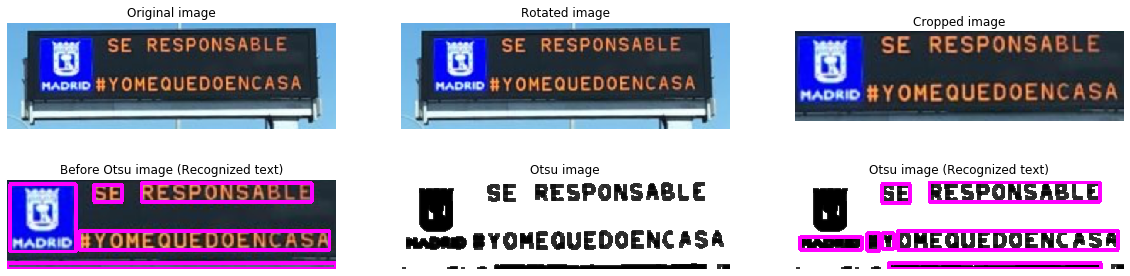


Tesseract recogntion before otsu:
---------------------------------

y SE RESPONSABLE
HYOMEQUEDOENCASA

Tesseract recogntion after otsu:
--------------------------------

SE RESPONSABLE
maprio Y Y OMEQUEDOENCASA


Mean rotation angle: -1.0



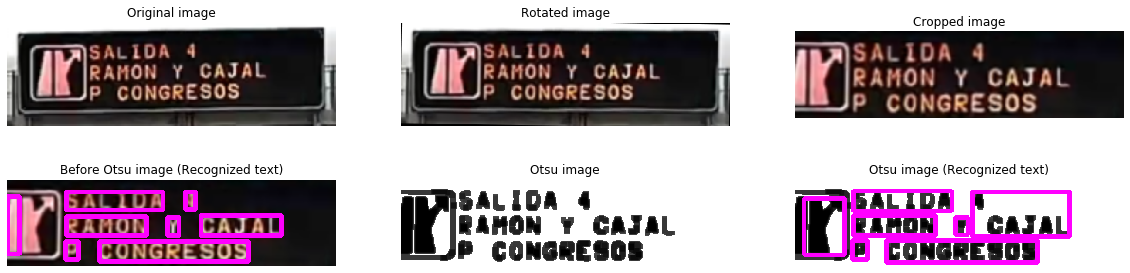


Tesseract recogntion before otsu:
---------------------------------

SALIDA 4
| RAMON Y CAJAL
P CONGRESOS

Tesseract recogntion after otsu:
--------------------------------

SALIDA
Il jearos Y casal
PP” CONGRESOS


Mean rotation angle: 3.0



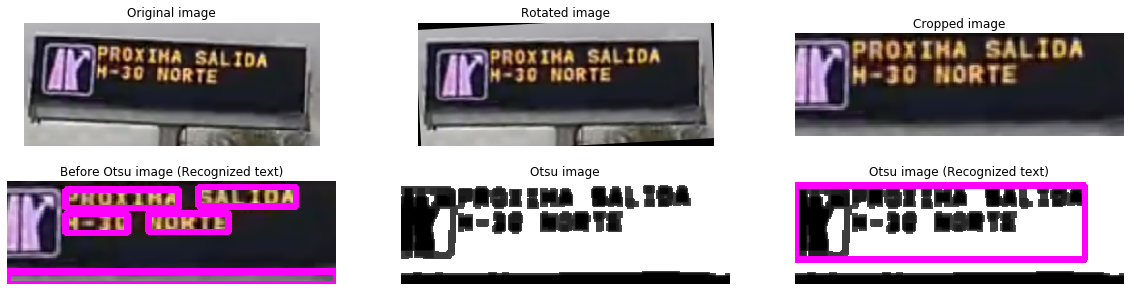


Tesseract recogntion before otsu:
---------------------------------

PROXIMA SALIDA
M-30 NORTE

Tesseract recogntion after otsu:
--------------------------------

Pana




In [9]:
for i in range(1, 9):
    
    # Image reading.
    img_original = cv2.imread("test_ocr/" + str(i) + ".png")
    cv2.imwrite('test_ocr/' + str(i) + "/img_original.png", img_original)
    
    # Resize.
    img_original = cv2.resize(img_original, (img_original.shape[1]*2, img_original.shape[0]*2))
    
    # Fix image rotation.
    img_rotated, img_r_lines = functions.fix_rotation(img_original, 5, 0.5)
    cv2.imwrite('test_ocr/' + str(i) + "/img_r_lines.png", img_r_lines)
    cv2.imwrite('test_ocr/' + str(i) + "/img_rotated.png", img_rotated)
    
    # Horizontal crop.
    img_hc_cropped, img_hc_lines = functions.crop_image(img_rotated, 0, 1, True, int(img_rotated.shape[1]/6), int(img_rotated.shape[0]/6), "h")
    cv2.imwrite('test_ocr/' + str(i) + "/img_hc_lines.png", img_hc_lines)
    cv2.imwrite('test_ocr/' + str(i) + "/img_hc_cropped.png", img_hc_cropped)
    
    # Vertical crop.
    img_vc_cropped, img_vc_lines = functions.crop_image(img_hc_cropped, 88, 92, True, int(img_rotated.shape[0]/6), int(img_rotated.shape[1]/10), "v")
    cv2.imwrite('test_ocr/' + str(i) + "/img_vc_lines.png", img_vc_lines)
    cv2.imwrite('test_ocr/' + str(i) + "/img_vc_cropped.png", img_vc_cropped)
    
    # Otsu method.
    img_ocr, otsu, close = functions.prepare_for_ocr(img_vc_cropped)
    cv2.imwrite('test_ocr/' + str(i) + "/img_ocr.png", img_ocr)
    cv2.imwrite('test_ocr/' + str(i) + "/otsu.png", otsu)
    cv2.imwrite('test_ocr/' + str(i) + "/close.png", close)
    
    # Tesseract recognition before otsu.
    result_tesseract = pytesseract.image_to_data(cv2.bitwise_not(img_vc_cropped), lang="spa", output_type=Output.DICT)
    img_vc_cropped_text = functions.draw_detected_text(img_vc_cropped, result_tesseract)
    
    # Tesseract recognition after otsu.
    result_tesseract = pytesseract.image_to_data(img_ocr, lang="spa", output_type=Output.DICT)
    img_ocr_text = functions.draw_detected_text(cv2.cvtColor(img_ocr, cv2.COLOR_BGR2RGB), result_tesseract)
    
    # Plot results.
    functions.plot_results([(img_original, "Original image"), 
                            (img_rotated, "Rotated image"),
                            (img_vc_cropped, "Cropped image"),
                            (img_vc_cropped_text, "Before Otsu image (Recognized text)"),
                            (img_ocr, "Otsu image"), 
                            (img_ocr_text, "Otsu image (Recognized text)")
                           ])
    
    # Recognized text.
    text = pytesseract.image_to_string(cv2.bitwise_not(img_vc_cropped), lang="spa")
    print("\nTesseract recogntion before otsu:\n---------------------------------\n\n"  + text)
    text = pytesseract.image_to_string(img_ocr, lang="spa")
    print("\nTesseract recogntion after otsu:\n--------------------------------\n\n"  + text) 

    print("\n=====================================================================\n")

![title](notebook_data/imgs/ty.jpg)